# This is a demo Notebook that walks you through some basic data operations using [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

### Read data into a variable

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('demo.csv')

### How to explore data

In [3]:
data

,get,patch,upsert
0,1530.0,140.0,2.0
1,7181.0,140.0,2.0
2,7181.0,836.0,2.0
3,7181.0,834.0,2.0
4,6914.0,834.0,2.0
...,...,...,...
95,6429.0,722.0,1.0
96,6508.0,722.0,1.0
97,7055.0,722.0,1.0
98,7055.0,886.0,1.0


In [4]:
data.head()

,get,patch,upsert
0,1530.0,140.0,2.0
1,7181.0,140.0,2.0
2,7181.0,836.0,2.0
3,7181.0,834.0,2.0
4,6914.0,834.0,2.0


* select columns

In [5]:
data['get']

0     1530.0
1     7181.0
2     7181.0
3     7181.0
4     6914.0
       ...  
95    6429.0
96    6508.0
97    7055.0
98    7055.0
99    7055.0
Name: get, Length: 100, dtype: float64

In [6]:
data[['get', 'patch']]

,get,patch
0,1530.0,140.0
1,7181.0,140.0
2,7181.0,836.0
3,7181.0,834.0
4,6914.0,834.0
...,...,...
95,6429.0,722.0
96,6508.0,722.0
97,7055.0,722.0
98,7055.0,886.0


* select rows

In [7]:
data.loc[1]

get       7181.0
patch      140.0
upsert       2.0
Name: 1, dtype: float64

In [8]:
data.loc[2:5]

,get,patch,upsert
2,7181.0,836.0,2.0
3,7181.0,834.0,2.0
4,6914.0,834.0,2.0
5,6914.0,834.0,2.0


* show statistics

In [9]:
data.describe()

,get,patch,upsert
count,100.000000,100.00000,100.000000
mean,6544.220000,769.25000,1.180000
std,627.287258,109.80804,0.386123
min,1530.000000,140.00000,1.000000
25%,6286.000000,727.00000,1.000000
50%,6596.000000,790.00000,1.000000
75%,6898.500000,834.00000,1.000000
max,7337.000000,946.00000,2.000000


In [10]:
data.mean()

get       6544.22
patch      769.25
upsert       1.18
dtype: float64

In [11]:
data['get'].mean()

6544.22

In [12]:
# filter out interested rows
data[data['get'] > 7000]

,get,patch,upsert
1,7181.0,140.0,2.0
2,7181.0,836.0,2.0
3,7181.0,834.0,2.0
8,7265.0,837.0,2.0
9,7265.0,837.0,1.0
22,7068.0,802.0,1.0
23,7068.0,790.0,1.0
52,7337.0,946.0,1.0
53,7337.0,705.0,1.0
97,7055.0,722.0,1.0


In [13]:
data['sum'] = data.sum(axis=1)
data

,get,patch,upsert,sum
0,1530.0,140.0,2.0,1672.0
1,7181.0,140.0,2.0,7323.0
2,7181.0,836.0,2.0,8019.0
3,7181.0,834.0,2.0,8017.0
4,6914.0,834.0,2.0,7750.0
...,...,...,...,...
95,6429.0,722.0,1.0,7152.0
96,6508.0,722.0,1.0,7231.0
97,7055.0,722.0,1.0,7778.0
98,7055.0,886.0,1.0,7942.0


* show the correlations between each columns

In [14]:
data.corr()

,get,patch,upsert,sum
get,1.000000,0.531862,-0.073563,0.990938
patch,0.531862,1.000000,-0.152113,0.640786
upsert,-0.073563,-0.152113,1.000000,-0.090273
sum,0.990938,0.640786,-0.090273,1.000000


### plotting

<AxesSubplot:>

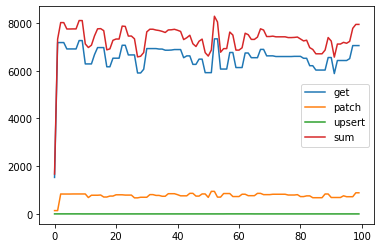

In [15]:
data.plot()

* show kenerl density chart (distribution)

<AxesSubplot:ylabel='Density'>

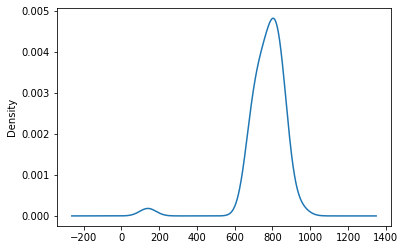

In [16]:
data['patch'].plot.kde()

## How to install Jupyter Notebook on your local machine?

 * Follow instructions here to intall a local one: <https://www.intunewiki.com/wiki/Jupyter_Notebook>

## How to query Kusto? (only works on locally installed version)

1. Basic: query intune/intune

In [ ]:
from iquery import config, kusto
query = """
IntuneEvent
| where env_time > ago(1h)
| take 10
| project env_time, EventUniqueName, ServiceName, Col1
"""

result = kusto(query)

In [ ]:
result.head()

2. Query a different cluster/database

In [ ]:
from iquery import KustoClient
kc = KustoClient('IcmDataWarehouse', 'icmcluster')
query = '''
IncidentsSnapshot(true)
| where CreateDate >= ago(7d)
| where OwningTenantName == 'Microsoft Intune'
| take 5
'''
data = kc.kusto(query, use_time_index=False)
data.head()

* When dealing with kusto & mdm data, pivot is a very common command to put different types of data into their own columns, examples are below

In [17]:
data2 = pd.read_csv('demo2.csv')
data2.head()

,_time,roleinstance,httpVerb,requestCount
0,2021-03-18 02:07:00+00:00,mtfabricu_IN_17,get,1530
1,2021-03-18 02:07:00+00:00,mtfabricu_IN_17,patch,140
2,2021-03-18 02:08:00+00:00,mtfabricu_IN_17,patch,836
3,2021-03-18 02:08:00+00:00,mtfabricu_IN_17,get,7181
4,2021-03-18 02:08:00+00:00,mtfabricu_IN_17,delete,1


In [18]:
pivot_data = data2.pivot(index='_time', columns='httpVerb', values='requestCount')
pivot_data.head()

httpVerb,delete,get,patch,upsert
_time,,,,
2021-03-18 02:07:00+00:00,NaN,1530.0,140.0,NaN
2021-03-18 02:08:00+00:00,1.0,7181.0,836.0,NaN
2021-03-18 02:09:00+00:00,1.0,6914.0,834.0,2.0
2021-03-18 02:10:00+00:00,NaN,7265.0,837.0,NaN
2021-03-18 02:11:00+00:00,NaN,6286.0,687.0,NaN


# If you want to learn more

1. Read all the resources shared in day of learning email
2. Look at other examples in the zip/repo
3. Ask questions in this bridge or in our [Teams channel](https://teams.microsoft.com/l/channel/19%3a6ed0d93998104a83b77dc45cacb179e8%40thread.skype/Ask%2520Jupyter%2520Notebook?groupId=9f67747e-53cb-4d4f-8a60-e849ef90fac0&tenantId=72f988bf-86f1-41af-91ab-2d7cd011db47)
4. You may want to work on VSCode instead of WebUI as it has **intellisense** and better **source control** supports